In [1]:
import os
import numpy as np
import pandas as pd
from importlib import reload
from astropy.io import fits
from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib.pylab as pl
import tempfile
import imageio
from scipy import signal
from scipy.optimize import curve_fit
# super special:
import sparkles.spark as spkl
import sparkles.spark_plots as sp
# python file made for this mode
import sparkles.spark_lab as slab

# SelfRMs pre-Run

In [2]:
lab_dir = '~/data/2024Aa/selfRMs/'

In [3]:
# testing SelfRMs from cleanroom tests
test_rm = lab_dir + 'selfRM_20240315_test4_recalibrated.fits'
test_old = lab_dir + 'selfRM_test3_bettergains.fits'
lab_sRM = '~/data/2023A/selfRMs/LAB/selfRM_20230311_12_LAB_spark_1800_020amps_20seps.fits'
test_data = np.diag(fits.open(test_rm)[0].data[5])
test_old_data = np.diag(fits.open(test_rm)[0].data[5])
lab_data = np.diag(fits.open(lab_sRM)[0].data[5])

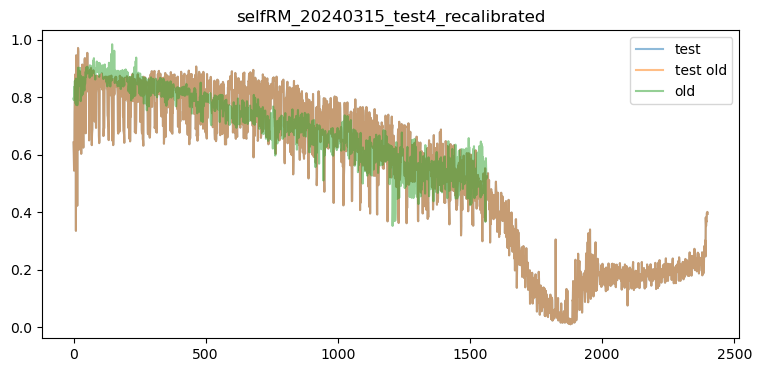

In [4]:
# plotting by modes
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9,4), facecolor='white', sharex=True)
plt.title('selfRM_20240315_test4_recalibrated')
plt.plot(test_data, alpha=0.5,  label='test')
plt.plot(test_old_data, alpha=0.5,  label='test old')
plt.plot(lab_data, alpha=0.5,  label = 'old')
plt.legend()
plt.show()

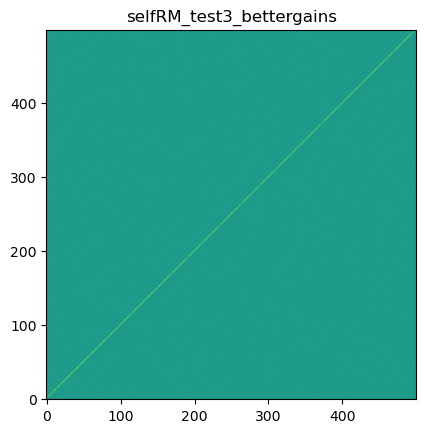

In [5]:
# plotting image cube
lab_image = fits.open(test_rm)[0].data[5]
plt.imshow(lab_image[0:500, 0:500], origin='lower')
plt.title('selfRM_test3_bettergains')
plt.show()